<center style='height:1122px;width:794px;margin-left:100px'>
<hr>
    <center style='font-size:45px;margin-top:100px;font-style:italic'>
        <h2>Concordia University</h2>
    </center>_
    <center style='color:gray;margin-top:40px;font-style:italic'>
        <h3>Dept. of Computer Science & Software Engineering</h3>
    </center>_
    <center style='margin-top:40px;margin-bottom:400px'>
        <h2>COMP 6731 - Pattern Recognition</h2>
    </center>
    <center style='margin-top:50px;margin-bottom:100px;font-size:25px;font-style:italic'>
        <h2>Project: Face Image Recognition</h2>
    </center>
    <center style='font-size:20px;margin:100px;color:gray'>
        <h6>Dong Chen: 40013109 </h6>
        <h6>Peilin Jiang: 40015338</h6>
        <h6>Peiran Wang: 40009962</h6>
    </center>
<hr>
</center>

## 1. Essential Tools and Python Libraries
* ### IPython Notebook
    > IPython is an alternative Python command line shell for interactive computing with lots of useful enhancements over the "default" Python interpreter.
The browser-based documents IPython Notebooks are a great environment for scientific computing: Not only to execute code, but also to add informative documentation via Markdown, HTML, LaTeX, embedded images, and inline data plots via e.g., matplotlib.

* ### Numpy
    > NumPy, short for Numerical Python. It provides the data structures, algorithms, and library glue needed for most scientific applications involving numerical data in Python. NumPy contains, among other things:
    >* A fast and efficient multidimensional array object ndarray
    >* Functions for performing element-wise computations with arrays or mathematical operations between arrays
    >* Tools for reading and writing array-based datasets to disk
    >* Linear algebra operations, Fourier transform, and random number generation
    >* A mature C API to enable Python extensions and native C or C++ code to access NumPy’s data structures and computational facilities

    > Beyond the fast array-processing capabilities that NumPy adds to Python, one of its primary uses in data analysis is as a container for data to be passed between algo‐ rithms and libraries.  

* ### Matplotlib
    > matplotlib is the most popular Python library for producing plots and other two- dimensional data visualizations.  
    
* ### Seaborn
    > ....

* ### Scikit-learn
    > Scikit-learn is is probably the most popular general machine library for Python. It includes a broad range of different classifiers, cross-validation and other model selection methods, dimensionality reduction techniques, modules for regression and clustering analysis, and a useful data-preprocessing module.
    
* ### Scikit-image
    > ...

In [1]:
# Face datasets from sklearn
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV,  cross_val_score, cross_val_predict

# Data visualization tool
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcdefaults()

# ndarray
import numpy as np

# For measure time cost
from time import time

# Classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Data Collection
Gether the face data sets from scikit-learn build-in datasets.

In [2]:
ori_faces = fetch_lfw_people(min_faces_per_person=80)

n_sample, h, w = ori_faces.images.shape
n_features = ori_faces.data.shape[1]
data_shape = ori_faces.data.shape
target_names = ori_faces.target_names
n_classes = len(target_names)

print('Total number of sample: {}'.format(n_sample))
print('Image size: {} x {}'.format(h, w))
print("Total features per IMG: {}".format(n_features))
print("DataFrame shape: {}".format(data_shape))
print('Target names: {}'.format(target_names))
print('Total classes: {}'.format(n_classes))

Total number of sample: 1140
Image size: 62 x 47
Total features per IMG: 2914
DataFrame shape: (1140, 2914)
Target names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
Total classes: 5


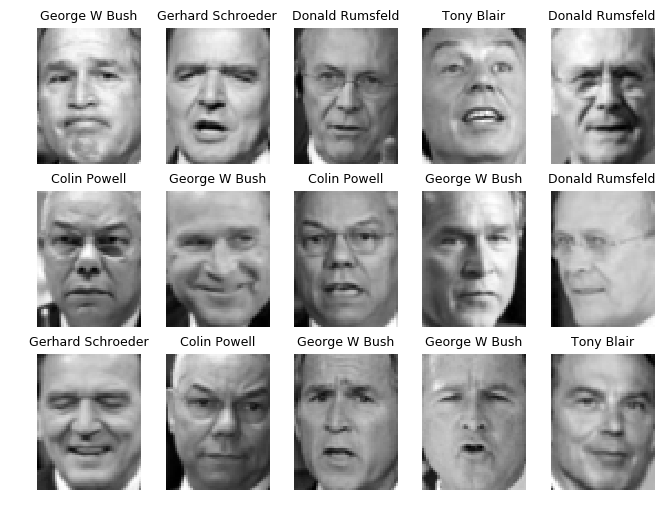

In [3]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(ori_faces.images[i], cmap='gray')
    axi.set_title(ori_faces.target_names[ori_faces.target[i]], fontsize=9)
    axi.axis('off')
plt.show()

## Split datasets into Train & Test

In [4]:
from sklearn.model_selection import train_test_split

st_time = time()

X_train, X_test, y_train, y_test = train_test_split(
    ori_faces.data, 
    ori_faces.target,
    random_state=42 # random_state is the seed used by the random number generator
)

print('Size of training sets: {}'.format(X_train.shape[0]))
print('Size of Testing sets: {}'.format(X_test.shape[0]))

print('Done in: {:0.3f}s'.format(time()-st_time))

Size of training sets: 855
Size of Testing sets: 285
Done in: 0.025s


## HOG Feature Extraction

/Users/AlexChen/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


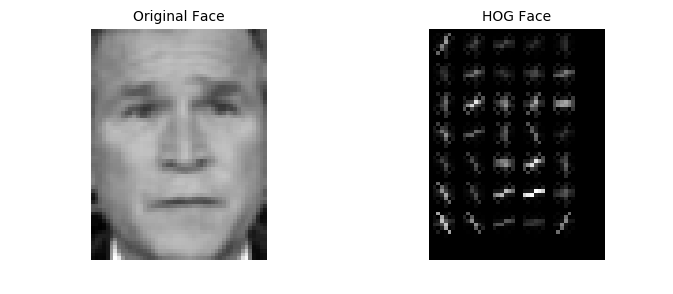

In [5]:
from skimage.feature import hog

X_train_hog = np.zeros(X_train.shape)
X_test_hog = np.zeros(X_test.shape)

for i in range(X_train.shape[0]):
    hog_vec, hog_vis = hog(X_train[i].reshape(h,w), visualise=True)
    X_train_hog[i] = hog_vis.flat
for i in range(X_test.shape[0]):
    hog_vec, hog_vis = hog(X_test[i].reshape(h,w), visualise=True)
    X_test_hog[i] = hog_vis.flat

fig, ax = plt.subplots(1, 2, figsize=(8,3), sharex=True, sharey=True)

ax[0].imshow(X_train[0].reshape(h,w), cmap='gray')
ax[0].set_title('Original Face', fontsize=10)
ax[0].axis('off')

ax[1].imshow(X_train_hog[0].reshape(h,w), cmap='gray')
ax[1].set_title('HOG Face', fontsize=10)
ax[1].axis('off')

plt.show()

## PCA Feature Extraction

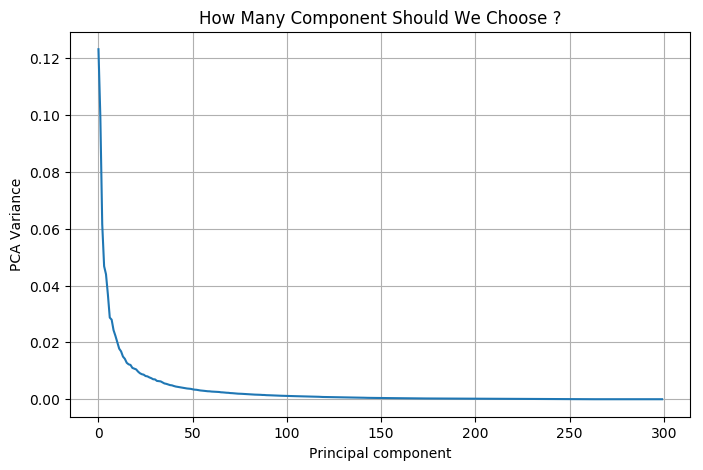

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300, svd_solver='randomized', whiten=True).fit(X_train_hog)

plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ / sum(pca.explained_variance_))
plt.xlabel('Principal component')
plt.ylabel('PCA Variance')
plt.title('How Many Component Should We Choose ?')
plt.grid(True)
plt.show()

In [7]:
st_time = time()

n_components = 200

print("Extracting the top {} component from HOG train set of {} faces.".format(n_components, X_train_hog.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_hog)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train_hog)
X_test_pca = pca.transform(X_test_hog)

print('Done in: {:0.3f}s'.format(time()-st_time))

Extracting the top 200 component from HOG train set of 855 faces.
Done in: 0.378s


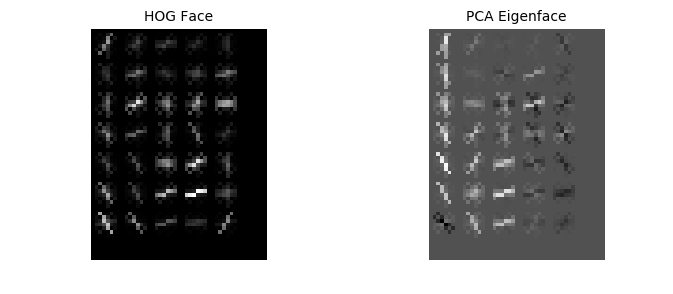

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharex=True, sharey=True)

ax[0].imshow(X_train_hog[0].reshape(h,w), cmap='gray')
ax[0].set_title('HOG Face', fontsize=10)
ax[0].axis('off')

ax[1].imshow(eigenfaces[0], cmap='gray')
ax[1].set_title('PCA Eigenface',fontsize=10)
ax[1].axis('off')
plt.show()

## Start Classification
* SVM
* KNN
* MLP

## GridSearchCV
### parameter mearning
> cv : int, cross-validation generator or an iterable, optional
Determines the cross-validation splitting strategy. Possible inputs for cv are:
None, to use the default 3-fold cross validation,
integer, to specify the number of folds in a (Stratified)KFold,
An object to be used as a cross-validation generator.
An iterable yielding train, test splits.
For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

### Support Vector Classificaton
> C: Penalty parameter C of the error term.  
> gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

In [9]:
from sklearn.svm import SVC

st_time = time()

param_grid_svc = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']} 
]

svc = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid_svc, cv=5)

svc = svc.fit(X_train_pca, y_train)
svc_predict = svc.predict(X_test_pca)
svc_accuracy = accuracy_score(y_test, svc_predict)*100

print('Best parameters set for SVC: ')
print(svc.best_params_)
print('-------------------------------------------------------')
print('Accuracy Score: {:0.3f}%'.format(svc_accuracy))
print('-------------------------------------------------------')
print('Classification Report for SVC: ')
print(classification_report(y_test, svc_predict))
print('-------------------------------------------------------')
print('Done in: {:0.3f}s'.format(time()-st_time))

Best parameters set for SVC: 
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-------------------------------------------------------
Accuracy Score: 84.211%
-------------------------------------------------------
Classification Report for SVC: 
             precision    recall  f1-score   support

          0       0.93      0.86      0.89        64
          1       0.68      0.81      0.74        32
          2       0.95      0.83      0.89       127
          3       0.65      0.76      0.70        29
          4       0.72      0.94      0.82        33

avg / total       0.86      0.84      0.85       285

-------------------------------------------------------
Done in: 14.556s


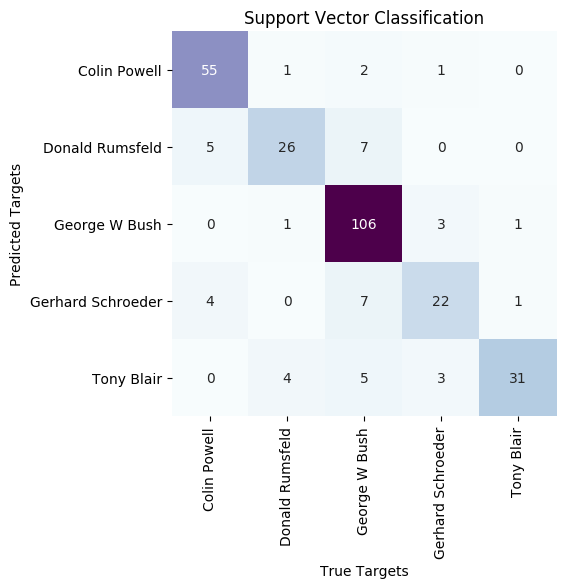

In [10]:
mat = confusion_matrix(y_test, svc_predict)

plt.figure(figsize=(8,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=ori_faces.target_names,
            yticklabels=ori_faces.target_names,
            cmap="BuPu")
plt.title('Support Vector Classification')
plt.xlabel('True Targets')
plt.ylabel('Predicted Targets')
plt.show()

### K Nearest Neighbors

In [12]:
from sklearn import neighbors

st_time = time()

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}

knn = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid_knn, cv=5)
knn.fit(X_train_pca, y_train)
knn_predict = knn.predict(X_test_pca)
knn_accuracy = accuracy_score(y_test, knn_predict)*100

print('Best parameters set for KNN: ')
print(knn.best_params_)
print('-------------------------------------------------------')
print('Accuracy Score: {:0.3f}%'.format(knn_accuracy))
print('-------------------------------------------------------')
print('Classification Report for KNN: ')
print(classification_report(y_test, knn_predict))
print('-------------------------------------------------------')
print('Done in: {:0.3f}s'.format(time()-st_time))

Best parameters set for KNN: 
{'n_neighbors': 5}
-------------------------------------------------------
Accuracy Score: 63.509%
-------------------------------------------------------
Classification Report for KNN: 
             precision    recall  f1-score   support

          0       0.77      0.58      0.66        64
          1       0.73      0.34      0.47        32
          2       0.59      0.94      0.72       127
          3       0.78      0.24      0.37        29
          4       0.64      0.21      0.32        33

avg / total       0.67      0.64      0.60       285

-------------------------------------------------------
Done in: 4.548s


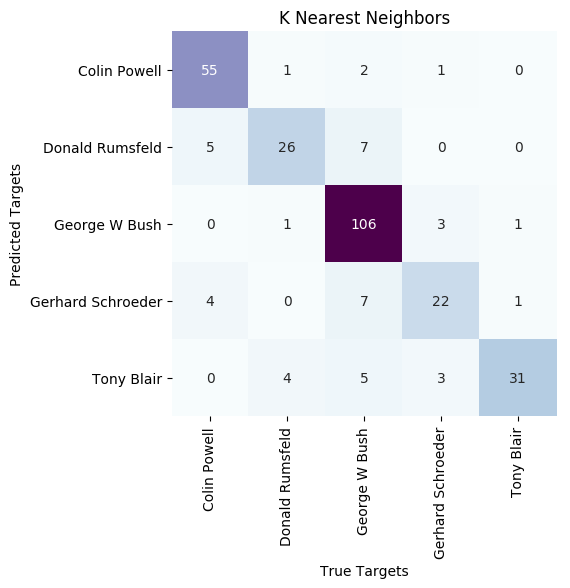

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=ori_faces.target_names,
            yticklabels=ori_faces.target_names,
            cmap="BuPu")
plt.title('K Nearest Neighbors')
plt.xlabel('True Targets')
plt.ylabel('Predicted Targets')
plt.show()

### Multi-Layer Perceptron
> Too small number of hidden_layer_sizes may not be sufficient to learn complex decision boundaries.  
> Too large number of hidden_layer_sizes may overfit the training data resulting in poor generalization.  

In [14]:
from sklearn.neural_network import MLPClassifier

st_time = time()

param_grid_mlp = {
    'hidden_layer_sizes': [10, 50, 100, 125, 150, 172, 200]
}

mlp = GridSearchCV(MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, random_state=42), param_grid_mlp, cv=5)

mlp.fit(X_train_pca, y_train)
mlp_predict = mlp.predict(X_test_pca)
mlp_accuracy = accuracy_score(y_test, mlp_predict)*100

print('Best parameters set for MLP: ')
print(mlp.best_params_)
print('-------------------------------------------------------')
print('Accuracy Score: {:0.3f}%'.format(mlp_accuracy))
print('-------------------------------------------------------')
print('Classification Report for MLP: ')
print(classification_report(y_test, mlp_predict))
print('-------------------------------------------------------')
print('Done in: {:0.3f}s'.format(time()-st_time))

Best parameters set for MLP: 
{'hidden_layer_sizes': 172}
-------------------------------------------------------
Accuracy Score: 87.018%
-------------------------------------------------------
Classification Report for MLP: 
             precision    recall  f1-score   support

          0       0.98      0.88      0.93        64
          1       0.83      0.75      0.79        32
          2       0.89      0.92      0.90       127
          3       0.83      0.69      0.75        29
          4       0.72      0.94      0.82        33

avg / total       0.88      0.87      0.87       285

-------------------------------------------------------
Done in: 3.315s


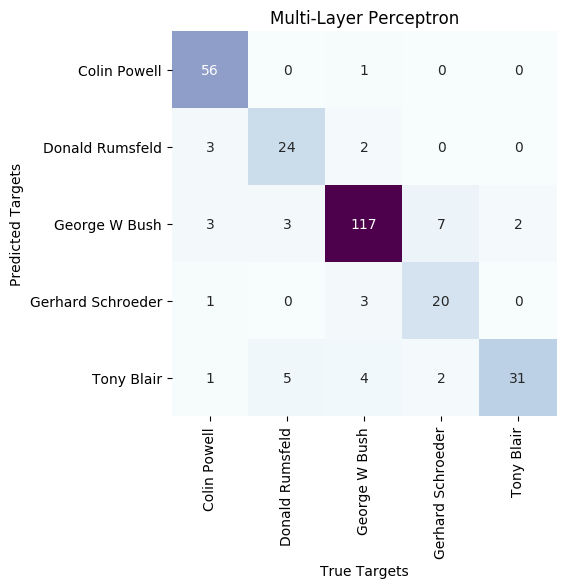

In [15]:
mat = confusion_matrix(y_test, mlp_predict)

plt.figure(figsize=(8,5))
# sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=ori_faces.target_names,
            yticklabels=ori_faces.target_names,
            cmap="BuPu")
plt.title('Multi-Layer Perceptron')
plt.xlabel('True Targets')
plt.ylabel('Predicted Targets')
plt.show()

## Conclusion

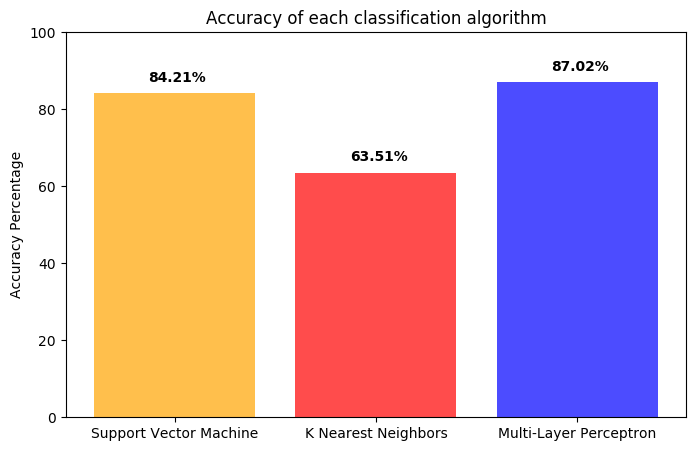

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
pca_objects = ('Support Vector Machine', 'K Nearest Neighbors', 'Multi-Layer Perceptron')
y_pos = np.arange(len(pca_objects))
colors = ('orange', 'red', 'blue')
pca_accuracy = [svc_accuracy, knn_accuracy, mlp_accuracy]

ax.bar(y_pos, pca_accuracy, align='center', color=colors, alpha=0.7, tick_label=pca_objects)
ax.set_ylabel('Accuracy Percentage')
ax.set_ylim(0, 100)
ax.set_title('Accuracy of each classification algorithm')

for i, v in enumerate(pca_accuracy):
    ax.text(i - 0.13, v + 3, str(format(v, '0.2f'))+'%', color='black', fontweight='bold')
plt.show()